In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Send a GET request to the IMDb page for the desired movie
url = "https://www.imdb.com/title/tt27995594/reviews"
response = requests.get(url)


In [3]:
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

In [4]:
# Find all the review text
reviews = soup.find_all('div', class_='text show-more__control')


In [5]:
# Extract the review text
review_texts = [review.text.strip() for review in reviews]


In [6]:
# Create a list to store the data
data = []

In [7]:
# Iterate over each review text
for review in reviews:
    # Extract the review text
    review_text = review.text.strip()
    
    # Analyze the sentiment of the review
    sentiment = 'good' if TextBlob(review_text).sentiment.polarity > 0 else 'bad'

    # Create a dictionary for each review
    review_dict = {
        'review': review_text,
        'sentiment': sentiment
    }
    data.append(review_dict)


In [8]:
# Write the data to the movie_reviews.csv file
with open('movie_reviews.csv', 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=['review', 'sentiment'])
    writer.writeheader()
    writer.writerows(data)


In [9]:
# Load the dataset
df = pd.read_csv('movie_reviews.csv', encoding='latin1')


In [10]:
# Check if the data is empty
if df.empty:
    print("The data is empty. Please ensure that the CSV file is not empty.")
else:
    # Preprocess the data
    df['sentiment'] = df['review'].apply(lambda x: 'good' if TextBlob(x).sentiment.polarity > 0 else 'bad')


In [11]:
# Encode the labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['sentiment'])


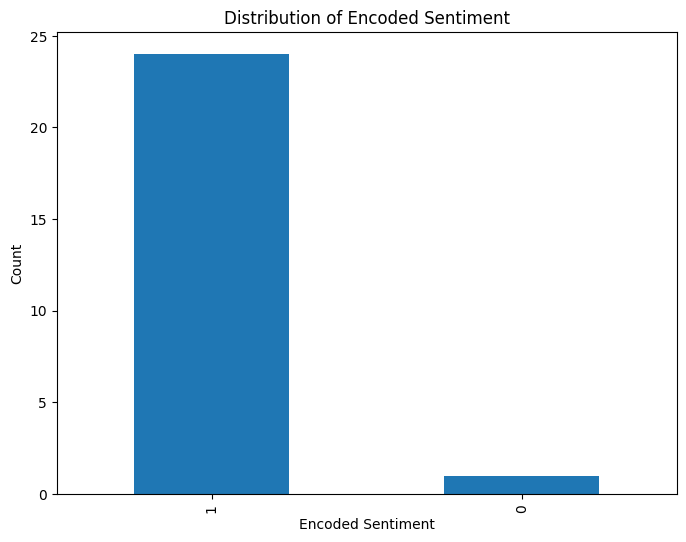

In [12]:
# Visualize the label encoded data
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Encoded Sentiment')
plt.xlabel('Encoded Sentiment')
plt.ylabel('Count')
plt.show()


In [13]:
# Vectorize the review text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review'])

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

In [15]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00
